In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image 

# Common Functions Used

In [ ]:
def mean(list):
  sum = 0
  for num in list:
    sum += int(num)
  avg = sum/len(list)
  return avg

In [ ]:
def sum(list):
  sum = mean(list)*len(list)
  return sum

# 1) Linear Regression 

## Functions Used

In [ ]:
def coeff(x, y):
  n = len(x)

  mean_x = mean(x)
  mean_y = mean(y)

  # b1_num = sum((x-mean_x)*(y-mean_y))
  # b1_den = sum((x-mean_x)**2)
  # b_1 = b1_num/b1_den

  SS_xy = sum(y*x) - n*mean_y*mean_x
  SS_xx = sum(x*x) - n*mean_x*mean_x

  b_1 = SS_xy / SS_xx
  b_0 = mean_y - b_1*mean_x

  return (b_0, b_1)

In [ ]:
def plot_regr_line(x, y, b):
  plt.scatter(x, y, color="b")

  y_pred = b[0] + b[1]*x

  plt.plot(x, y_pred, color="r")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

In [ ]:
def coeff_of_det(x, y):
  n = len(x)
  r2_num = (n*sum(x*y) - sum(x)*sum(y))**2
  r2_den = (n*sum(x*x) - (sum(x))**2) * (n*sum(y*y) - (sum(y))**2)
  r_2 = r2_num/r2_den
  return r_2

## Using Manual Calculations



#### Random Dataset

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [ ]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 1.2363636363636363  
 b_1 = 1.1696969696969697
Coefficient of Determination: 0.952538038613988


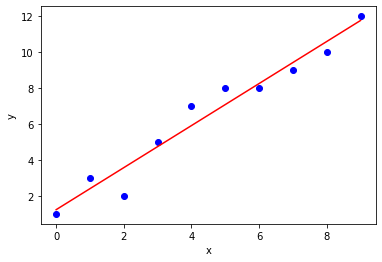

In [ ]:
plot_regr_line(x, y, b)

#### Kaggle Dataset

In [ ]:
data = pd.read_csv('Salary_Data.csv')
x = data['YearsExperience']
y = data['Salary']

In [ ]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 31650.50546021841  
 b_1 = 8990.370514820592
Coefficient of Determination: 1.2678138921682631


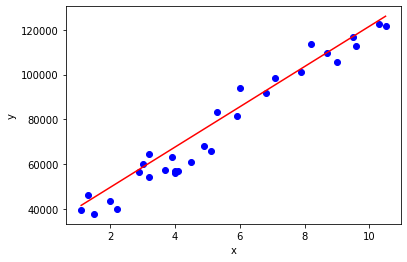

In [ ]:
plot_regr_line(x, y, b)

## Using Inbuilt Functions

#### Random Dataset

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape((-1, 1))
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.952538038613988
intercept: 1.2363636363636363
slope: [1.16969697]


#### Kaggle Dataset

In [ ]:
data = pd.read_csv('Salary_Data.csv')
x = np.array(data['YearsExperience']).reshape((-1, 1))
y = np.array(data['Salary'])

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9569566641435086
intercept: 25792.200198668696
slope: [9449.96232146]


# 2) Variance inflation factor (VIF)




```
# This is formatted as code
```

## Functions Used

In [ ]:
def VIF(x, y):
  R_2 = coeff_of_det(x,y)
  VIF_value = 1 / (1 - R_2)
  return VIF_value

In [ ]:
def predicted(x, b0, b1):
  y_pred = b_0 + b_1*x
  return y_pred

In [ ]:
def SSR(y_mean, y_pred):
  SSR_value = sum((y_mean - y_pred)**2)
  return SSR_value

In [ ]:
def SST(y_mean, y_i):
  SST_value = sum((y_i - y_mean)**2)
  return SST_value

In [ ]:
def SSE(y_pred, y_i):
  SSR_value = sum((y_i - y_pred)**2)
  return SSR_value

## Using Manual Calculations

In [ ]:
df = pd.DataFrame({'hours': [1, 1, 1, 2, 2, 2, 2, 2, 3, 3,
                             3, 4, 4, 4, 5, 5, 6, 7, 7, 8],
                   'score': [68, 76, 74, 80, 76, 78, 81, 84, 86, 83,
                             88, 85, 89, 94, 93, 94, 96, 89, 92, 97]})

y = df['score'].to_numpy()
x = df['hours'].to_numpy()

In [ ]:
y_mean = mean(y)
b_0,b_1 = coeff(x,y)
y_pred = predicted(x, b_0, b_1)
# print(y_pred)

In [ ]:
print(f"The SSR for the given model is: {SSR(y_mean, y_pred)}")
print(f"The SST for the given model is: {SST(y_mean, y)}")
print(f"The SSE for the given model is: {SSE(y_pred, y)}")
print(f"The VIF value is: {VIF(x, y)}")

The SSR for the given model is: 908.0
The SST for the given model is: 1239.0
The SSE for the given model is: 322.0
The VIF value is: 3.7712011914828465


# 3) Image Processing (extra)


In [ ]:
image = Image.open('gray_img.jpg')
print(image.format)
print(image.size)
print(image.mode)

PNG
(500, 375)
RGBA


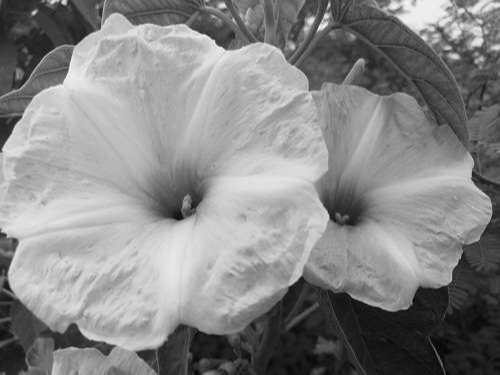

In [ ]:
image

In [ ]:
numpydata = np.asarray(image)
print(type(numpydata))
print(numpydata.shape)
# print(numpydata)

<class 'numpy.ndarray'>
(375, 500, 4)


In [ ]:
noise = np.random.normal(0, .1, numpydata.shape)
new_data = noise + numpydata
# print(new_data)

In [ ]:
im = Image.fromarray((new_data * 255).astype(np.uint8))
print(im.mode)
print(im.size)
print(type(im))

RGBA
(500, 375)
<class 'PIL.Image.Image'>


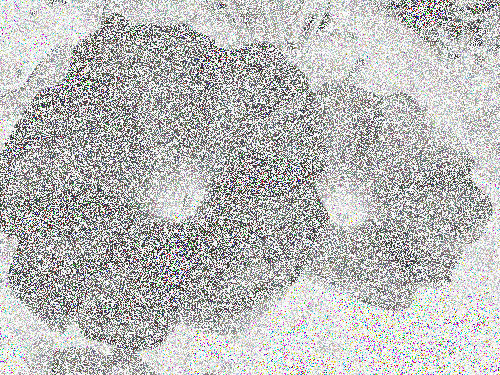

In [ ]:
im

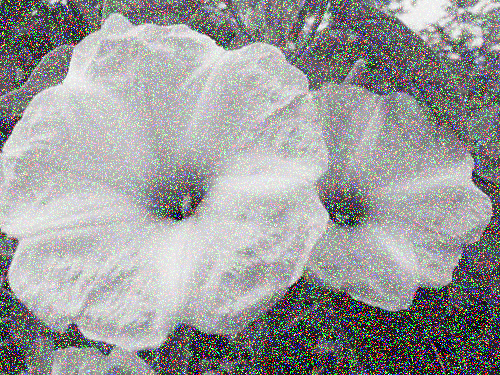

-1

In [ ]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)
# cv2.imshow('a',img_gauss)
cv2.waitKey(0)

<class 'numpy.ndarray'>


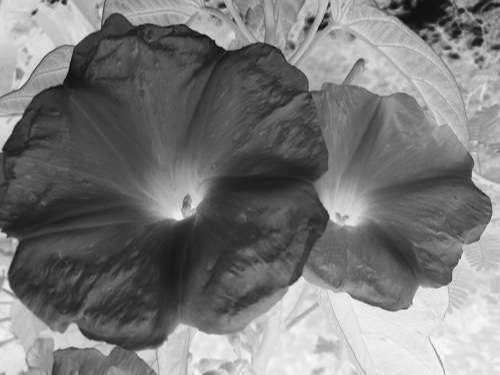

In [ ]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')
print(type(img))
numpyData = np.asarray(img)
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
# img_gauss = cv2.add(img,gauss)
newData = gauss + numpyData
# Display the image
im = Image.fromarray((newData * 255).astype(np.uint8))
im
# cv2_imshow(img_gauss)
# cv2.imshow('a',img_gauss)
# cv2.waitKey(0)

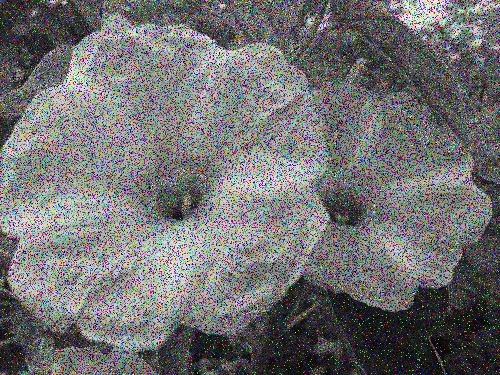

In [ ]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

cv2_imshow(noise)
# cv2.waitKey(0)

# 4) Noise and Graph

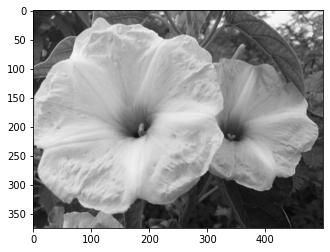

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('gray_img.jpg')

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')
plt.show()

In [ ]:
imgGray.shape

(375, 500)

Enter the variance you want to add? 24


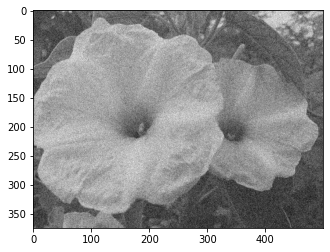

In [ ]:
var = int(input("Enter the variance you want to add? "))
noise = np.random.normal(0, var, imgGray.shape)
# print(noise)
new_data = noise + imgGray
plt.imshow(new_data, cmap="gray")

# 5) Confusion Matrix



## Using Manual Calculations


### Random Dataset


In [ ]:
actual = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
predicted = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

In [ ]:
def comp_confmat(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

In [ ]:
confusion_matrix = comp_confmat(actual, predicted)
print(confusion_matrix)

[[3. 0. 0. 0. 1.]
 [2. 1. 0. 1. 0.]
 [0. 1. 3. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]]


In [ ]:
tot_sum = 0
for i in range(0, len(confusion_matrix)):
  for j in range(0, len(confusion_matrix)): 
    tot_sum += confusion_matrix[i][j]
tot_sum

15.0

In [ ]:
# Hence we've a case of multi class classification
def params(mat, n):
  col_sum = [sum([row[i] for row in mat]) for i in range(0,len(mat[0]))]
  row_sum = [sum(mat[i]) for i in range(len(mat))]
  tp = mat[n][n]
  fp = row_sum[n] - tp
  fn = col_sum[n] - tp
  tn = tot_sum - fp - fn - tp
  param = []
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  param.append(accuracy)
  precision = tp / (tp + fp)
  param.append(precision)
  recall = tp / (tp + fn)
  param.append(recall)
  f1_score = (2 * precision * recall) / (precision + recall)
  param.append(f1_score)
  return param

In [ ]:
for i in range(len(confusion_matrix)):
  print(f"For the class {i+1}, the values are as follows: ")
  print(f"Accuracy: {params(confusion_matrix,i)[0]}")
  print(f"Precision: {params(confusion_matrix,i)[1]}")
  print(f"Recall: {params(confusion_matrix,i)[2]}")
  print(f"F1-Score: {params(confusion_matrix,i)[3]}")
  print("*********************")

For the class 1, the values are as follows: 
Accuracy: 0.8
Precision: 0.75
Recall: 0.6
F1-Score: 0.6666666666666665
*********************
For the class 2, the values are as follows: 
Accuracy: 0.6
Precision: 0.25
Recall: 0.25
F1-Score: 0.25
*********************
For the class 3, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
*********************
For the class 4, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************
For the class 5, the values are as follows: 
Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


### Using a random image


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('gray_img.jpg')

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
imgGray

array([[ 97.9902,  76.9923,  54.9945, ..., 124.9875, 122.9877, 121.9878],
       [ 93.9906,  72.9927,  53.9946, ..., 141.9858, 136.9863, 131.9868],
       [ 87.9912,  67.9932,  50.9949, ..., 172.9827, 168.9831, 163.9836],
       ...,
       [ 54.9945,  55.9944,  65.9934, ...,  30.9969,  28.9971,  26.9973],
       [ 74.9925,  75.9924,  87.9912, ...,  32.9967,  30.9969,  28.9971],
       [ 83.9916,  82.9917,  95.9904, ...,  33.9966,  31.9968,  29.997 ]])